<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


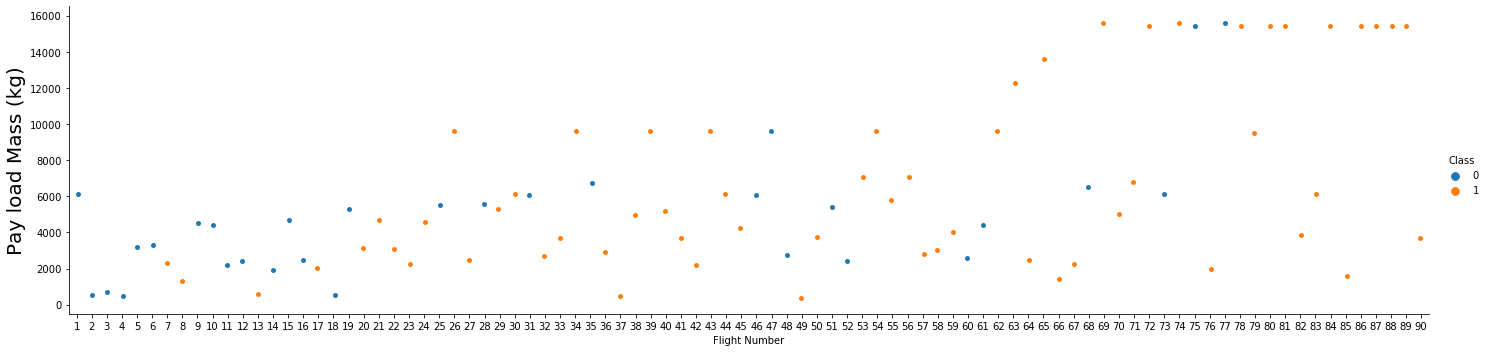

In [7]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect =4)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [19]:
# Average Pay Laod Mass and probability of the positive outcome during the first 45 launches 
df[df['FlightNumber']<=45].groupby('LaunchSite')[['PayloadMass','Class']].mean()

,PayloadMass,Class
LaunchSite,,
CCAFS SLC 40,5548.207786,0.600000
KSC LC 39A,7606.450856,0.772727
VAFB SLC 4E,5919.461538,0.769231


In [18]:
# Average Pay Laod Mass and probability of the positive outcome during the last 45 launches 
df[df['FlightNumber']>45].groupby('LaunchSite')[['PayloadMass','Class']].mean()

,PayloadMass,Class
LaunchSite,,
CCAFS SLC 40,7633.707221,0.724138
KSC LC 39A,11183.895941,0.800000
VAFB SLC 4E,6170.833333,0.833333


In [73]:
# Total Payload Mass by launch site
round(df.groupby('LaunchSite')['PayloadMass'].sum(),3)

LaunchSite
CCAFS SLC 40    305151.428
KSC LC 39A      167341.919
VAFB SLC 4E      76953.000
Name: PayloadMass, dtype: float64

In [80]:
# Mean of Reused, Flights and Rate of positive outcome
round(df.groupby('LaunchSite')[['Reused','Flights','Class']].mean(),3)

,Reused,Flights,Class
LaunchSite,,,
CCAFS SLC 40,0.382,1.764,0.600
KSC LC 39A,0.455,2.000,0.773
VAFB SLC 4E,0.462,1.538,0.769


In [76]:
# Total Payload Mass by orbit
round(df.groupby('Orbit')['PayloadMass'].sum(),3)

Orbit
ES-L1       570.000
GEO        6104.959
GTO      135323.850
HEO         350.000
ISS       68878.700
LEO       27179.878
MEO       11961.000
PO        68253.000
SO         6104.959
SSO       10300.000
VLEO     214420.000
Name: PayloadMass, dtype: float64

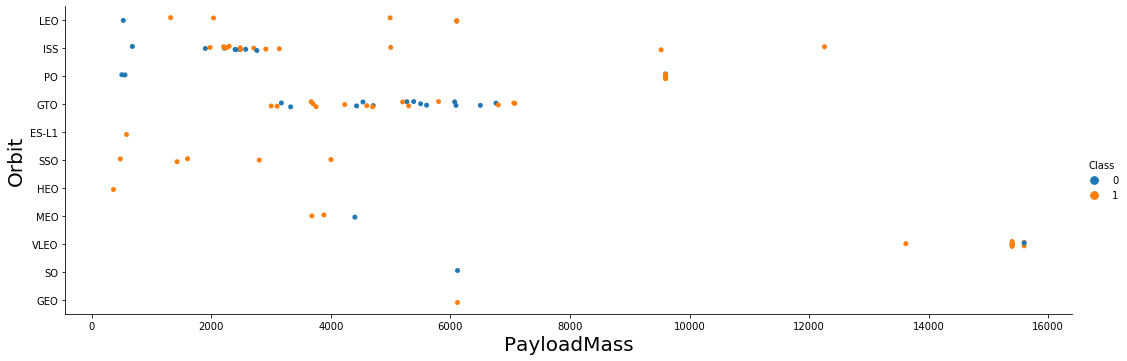

In [24]:
sns.catplot(y="Orbit",x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.ylabel("Orbit",fontsize=20)
plt.xlabel("PayloadMass",fontsize=20)
plt.show()

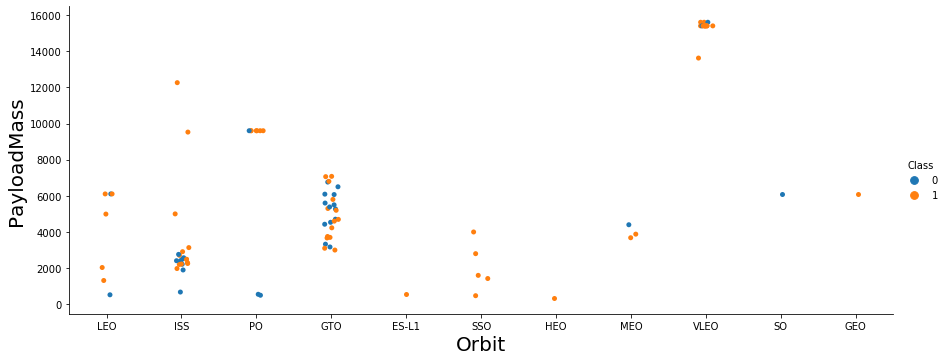

In [30]:
sns.catplot(y="PayloadMass",x="Orbit", hue="Class", data=df, aspect = 2.5)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

In [77]:
# Probability of success of the first 45 launch of each  orbit 
round(df[df['FlightNumber']<=90].groupby('Orbit')['Class'].mean(),2)

Orbit
ES-L1    1.00
GEO      1.00
GTO      0.52
HEO      1.00
ISS      0.62
LEO      0.71
MEO      0.67
PO       0.67
SO       0.00
SSO      1.00
VLEO     0.86
Name: Class, dtype: float64

In [32]:
# Probability of success of the first 45 launch of each  orbit 
round(df[df['FlightNumber']>45].groupby('Orbit')['Class'].mean(),2)

Orbit
GEO     1.00
GTO     0.67
HEO     1.00
ISS     0.67
MEO     0.67
PO      0.67
SO      0.00
SSO     1.00
VLEO    0.86
Name: Class, dtype: float64

In [179]:
# Probability of success by  orbit 
print('Probability of success by: ')
print(round(df.groupby('Orbit')[['Class']].mean(),2))
print('------------------------------')
print('Total Outcome: ')
print(round(df.groupby('Orbit')['Class'].value_counts(),2))

Probability of success by: 
       Class
Orbit       
ES-L1   1.00
GEO     1.00
GTO     0.52
HEO     1.00
ISS     0.62
LEO     0.71
MEO     0.67
PO      0.67
SO      0.00
SSO     1.00
VLEO    0.86
------------------------------
Total Outcome: 
Orbit  Class
ES-L1  1         1
GEO    1         1
GTO    1        14
       0        13
HEO    1         1
ISS    1        13
       0         8
LEO    1         5
       0         2
MEO    1         2
       0         1
PO     1         6
       0         3
SO     0         1
SSO    1         5
VLEO   1        12
       0         2
Name: Class, dtype: int64


In [16]:
# Average Pay Laod Mass and probability of the launch outcome for the first 45 flights by each orbit
df[df['FlightNumber']<=45].groupby('Orbit')[['PayloadMass','Class']].mean()

,PayloadMass,Class
Orbit,,
ES-L1,570.000000,1.000000
GTO,4659.000000,0.444444
ISS,2305.416667,0.583333
LEO,3882.839748,0.714286
PO,6575.500000,0.666667
SSO,475.000000,1.000000


In [17]:
# Average Pay Laod Mass and probability of the launch outcome for the first 45 flights by each orbit
df[df['FlightNumber']>45].groupby('Orbit')[['PayloadMass','Class']].mean()

,PayloadMass,Class
Orbit,,
GEO,6104.959412,1.000000
GTO,5717.983333,0.666667
HEO,350.000000,1.000000
ISS,4579.300000,0.666667
MEO,3987.000000,0.666667
PO,9600.000000,0.666667
SO,6104.959412,0.000000
SSO,2456.250000,1.000000
VLEO,15315.714286,0.857143


In [33]:
# Probability of success in the launch with payload 
# less than the half of more than the half for each launch site
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(df[df['PayloadMass']<half].groupby('LaunchSite')['Class'].mean())
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
df[df['PayloadMass']>half].groupby('LaunchSite')['Class'].mean()

Probability of success for launch with Payload Mass <  7625.0 kg
LaunchSite
CCAFS SLC 40    0.543478
KSC LC 39A      0.733333
VAFB SLC 4E     0.666667
Name: Class, dtype: float64
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg


LaunchSite
CCAFS SLC 40    0.888889
KSC LC 39A      0.857143
VAFB SLC 4E     0.857143
Name: Class, dtype: float64

In [ ]:
# Probability of success in the launch with payload 
# less than the half of more than the half for each launch site
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(df[df['PayloadMass']<half].groupby('LaunchSite')['Class'].mean())
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
df[df['PayloadMass']>half].groupby('LaunchSite')['Class'].mean()

Probability of success for launch with Payload Mass <  7625.0 kg
LaunchSite
CCAFS SLC 40    0.543478
KSC LC 39A      0.733333
VAFB SLC 4E     0.666667
Name: Class, dtype: float64
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg


LaunchSite
CCAFS SLC 40    0.888889
KSC LC 39A      0.857143
VAFB SLC 4E     0.857143
Name: Class, dtype: float64

In [49]:
# Probability of success in the launch with payload with less than the half of Pay Laod Mass
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(round(df[df['PayloadMass']<half].groupby('LaunchSite')[['Class','PayloadMass']].mean(),2))
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
print(round(df[df['PayloadMass']>half].groupby('LaunchSite')[['Class','PayloadMass']].mean(),2))

Probability of success for launch with Payload Mass <  7625.0 kg
              Class  PayloadMass
LaunchSite                      
CCAFS SLC 40   0.54      3650.68
KSC LC 39A     0.73      4557.19
VAFB SLC 4E    0.67      1625.50
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg
              Class  PayloadMass
LaunchSite                      
CCAFS SLC 40   0.89     15246.67
KSC LC 39A     0.86     14140.57
VAFB SLC 4E    0.86      9600.00


In [39]:
# Probability of positive outcome in the launch with payload for the launches with:
# less than the half of Pay Laod Mass
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(round(df[df['PayloadMass']<half].groupby('Orbit')[['Class','PayloadMass']].mean(),2))
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
print(round(df[df['PayloadMass']>half].groupby('Orbit')[['Class','PayloadMass']].mean(),2))

Probability of success for launch with Payload Mass <  7625.0 kg
       Class  PayloadMass
Orbit                    
ES-L1   1.00       570.00
GEO     1.00      6104.96
GTO     0.52      5011.99
HEO     1.00       350.00
ISS     0.58      2478.67
LEO     0.71      3882.84
MEO     0.67      3987.00
PO      0.00       526.50
SO      0.00      6104.96
SSO     1.00      2060.00
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg
       Class  PayloadMass
Orbit                    
ISS     1.00     10892.00
PO      0.86      9600.00
VLEO    0.86     15315.71


In [22]:
# Probability of success of outcome and average of Pay Laod Mass by orbit
round(df.groupby(['Orbit'])[['PayloadMass','Class']].mean(),2)

,PayloadMass,Class
Orbit,,
ES-L1,570.00,1.00
GEO,6104.96,1.00
GTO,5011.99,0.52
HEO,350.00,1.00
ISS,3279.94,0.62
LEO,3882.84,0.71
MEO,3987.00,0.67
PO,7583.67,0.67
SO,6104.96,0.00


In [34]:
# Probability of success in the launch with payload 
# less than the half of more than the half for each Orbit
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(df[df['PayloadMass']<half].groupby('Orbit')['Class'].mean())
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
df[df['PayloadMass']>half].groupby('Orbit')['Class'].mean()

Probability of success for launch with Payload Mass <  7625.0 kg
Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.578947
LEO      0.714286
MEO      0.666667
PO       0.000000
SO       0.000000
SSO      1.000000
Name: Class, dtype: float64
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg


Orbit
ISS     1.000000
PO      0.857143
VLEO    0.857143
Name: Class, dtype: float64

In [50]:
# Probability of positive outcome in the launch with payload for the launches with:
# less than the half of Pay Laod Mass
half=(df['PayloadMass'].max()-df['PayloadMass'].min())/2
print('Probability of success for launch with Payload Mass < ', half,'kg')
print(round(df[df['PayloadMass']<half].groupby(['LaunchSite','Orbit'])[['Class','PayloadMass']].mean(),2))
print('------------------------------')
print('Probability of success for launch with Payload Mass > ', half,'kg')
print(round(df[df['PayloadMass']>half].groupby(['LaunchSite','Orbit'])[['Class','PayloadMass']].mean(),2))

Probability of success for launch with Payload Mass <  7625.0 kg
                    Class  PayloadMass
LaunchSite   Orbit                    
CCAFS SLC 40 ES-L1   1.00       570.00
             GEO     1.00      6104.96
             GTO     0.44      5126.33
             HEO     1.00       350.00
             ISS     0.50      2436.67
             LEO     0.60      3216.98
             MEO     0.67      3987.00
             SSO     1.00      1600.00
KSC LC 39A   GTO     0.67      4783.33
             ISS     1.00      2702.67
             LEO     1.00      5547.48
             SO      0.00      6104.96
VAFB SLC 4E  PO      0.00       526.50
             SSO     1.00      2175.00
------------------------------
Probability of success for launch with Payload Mass >  7625.0 kg
                    Class  PayloadMass
LaunchSite   Orbit                    
CCAFS SLC 40 VLEO    0.89     15246.67
KSC LC 39A   ISS     1.00     10892.00
             VLEO    0.80     15440.00
VAFB SLC 4E  PO     

In [23]:
# Success rate and mean of the payload mass for each launches site and orbit for first 45 launches
round(df[df['FlightNumber']<=45].groupby(['LaunchSite','Orbit'])[['PayloadMass','Class']].mean(),2)

PayloadMass  Class
LaunchSite   Orbit                    
CCAFS SLC 40 ES-L1       570.00   1.00
             GTO        4323.82   0.36
             ISS        2173.00   0.44
             LEO        3216.98   0.60
KSC LC 39A   GTO        5185.71   0.57
             ISS        2702.67   1.00
             LEO        5547.48   1.00
VAFB SLC 4E  PO         6575.50   0.67
             SSO         475.00   1.00

In [41]:
# Success rate and mean of the payload mass for each launches site and orbit for first 45 launches
round(df[df['FlightNumber']>45].groupby(['LaunchSite','Orbit'])[['PayloadMass','Class']].mean(),2)

PayloadMass  Class
LaunchSite   Orbit                    
CCAFS SLC 40 GEO        6104.96   1.00
             GTO        6387.41   0.57
             HEO         350.00   1.00
             ISS        2775.67   0.57
             MEO        3987.00   0.67
             SSO        1600.00   1.00
             VLEO      15246.67   0.89
KSC LC 39A   GTO        3375.00   1.00
             ISS       10892.00   1.00
             SO         6104.96   0.00
             VLEO      15440.00   0.80
VAFB SLC 4E  PO         9600.00   0.67
             SSO        2741.67   1.00

In [44]:
# Success rate and mean of the payload mass for each launches site and orbit
round(df.groupby(['LaunchSite','Orbit'])[['PayloadMass','Class']].mean(),2)

PayloadMass  Class
LaunchSite   Orbit                    
CCAFS SLC 40 ES-L1       570.00   1.00
             GEO        6104.96   1.00
             GTO        5126.33   0.44
             HEO         350.00   1.00
             ISS        2436.67   0.50
             LEO        3216.98   0.60
             MEO        3987.00   0.67
             SSO        1600.00   1.00
             VLEO      15246.67   0.89
KSC LC 39A   GTO        4783.33   0.67
             ISS        5978.40   1.00
             LEO        5547.48   1.00
             SO         6104.96   0.00
             VLEO      15440.00   0.80
VAFB SLC 4E  PO         7583.67   0.67
             SSO        2175.00   1.00

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


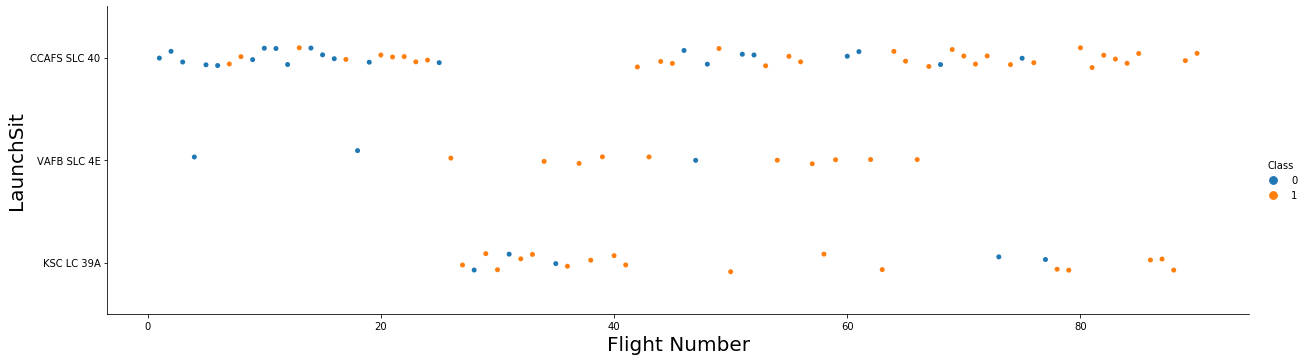

In [112]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3.5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSit",fontsize=20)
plt.show()

In [114]:
df[df['FlightNumber']<=45].groupby(['LaunchSite'])[['Class']].mean()

,Class
LaunchSite,
CCAFS SLC 40,0.461538
KSC LC 39A,0.750000
VAFB SLC 4E,0.714286


In [116]:
df[df['FlightNumber']>=45].groupby(['LaunchSite'])[['Class']].mean()

,Class
LaunchSite,
CCAFS SLC 40,0.733333
KSC LC 39A,0.800000
VAFB SLC 4E,0.833333


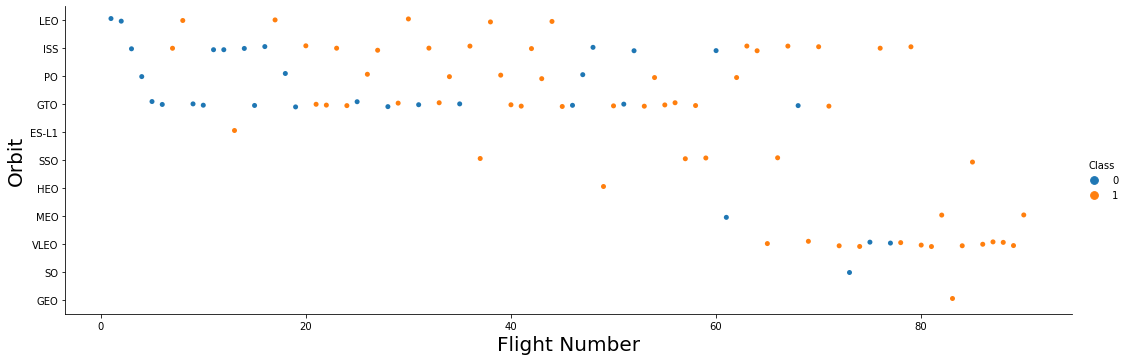

In [120]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [37]:
df[df['FlightNumber']<=45].groupby(['LaunchSite'])['Orbit'].value_counts()

LaunchSite    Orbit
CCAFS SLC 40  GTO      11
              ISS       9
              LEO       5
              ES-L1     1
KSC LC 39A    GTO       7
              ISS       3
              LEO       2
VAFB SLC 4E   PO        6
              SSO       1
Name: Orbit, dtype: int64

In [38]:
df[df['FlightNumber']>45].groupby(['LaunchSite'])['Orbit'].value_counts()

LaunchSite    Orbit
CCAFS SLC 40  VLEO     9
              GTO      7
              ISS      7
              MEO      3
              GEO      1
              HEO      1
              SSO      1
KSC LC 39A    VLEO     5
              GTO      2
              ISS      2
              SO       1
VAFB SLC 4E   PO       3
              SSO      3
Name: Orbit, dtype: int64

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


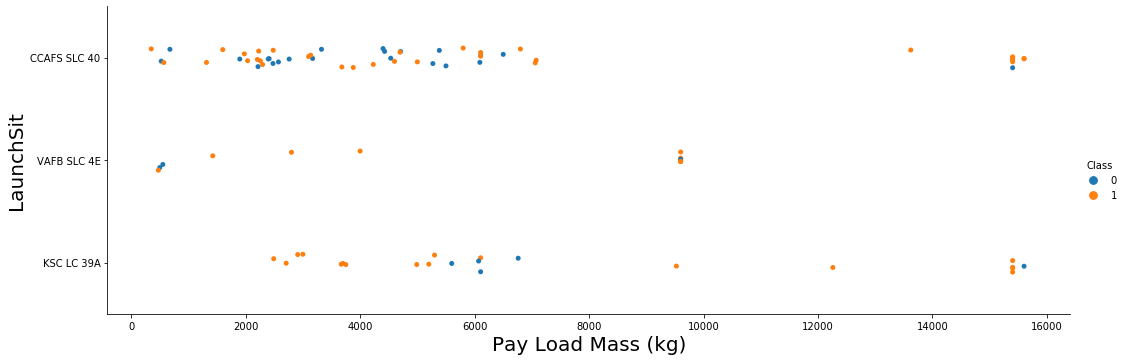

In [118]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite",x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("LaunchSit",fontsize=20)
plt.show()

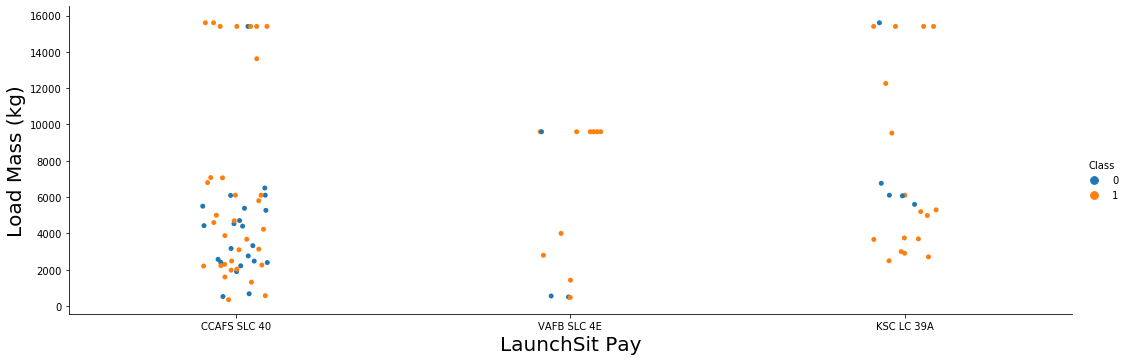

In [30]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 3)
plt.xlabel("LaunchSit Pay",fontsize=20)
plt.ylabel("Load Mass (kg)",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


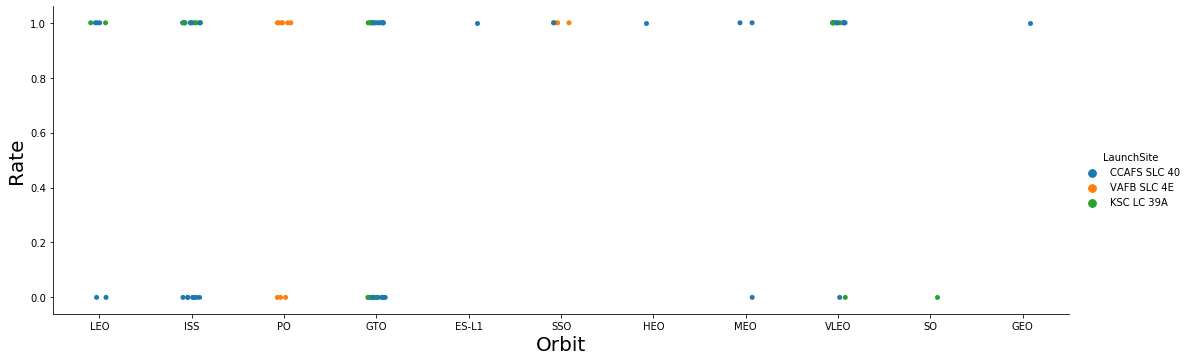

In [177]:
sns.catplot(y="Class", x="Orbit", hue="LaunchSite", data=df, aspect = 3)
plt.ylabel("Rate",fontsize=20)
plt.xlabel("Orbit",fontsize=20)
plt.show()

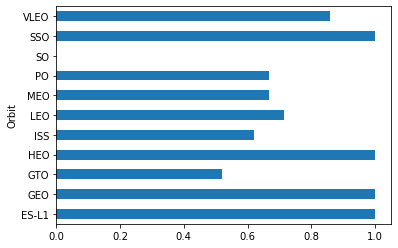

In [36]:
# HINT use groupby method on Orbit column and get the mean of Class column
df.groupby('Orbit')['Class'].mean().plot.barh()

In [33]:
 df.groupby('LaunchSite')['Class'].mean()

LaunchSite
CCAFS SLC 40    0.600000
KSC LC 39A      0.772727
VAFB SLC 4E     0.769231
Name: Class, dtype: float64

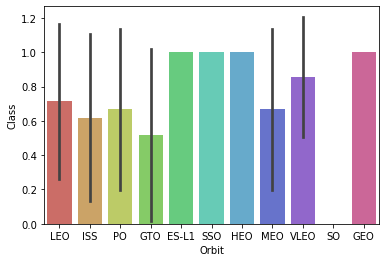

In [23]:
sns.barplot(x = 'Orbit',y = 'Class',data = df, palette = 'hls', ci='sd')
 
# Show the plot
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


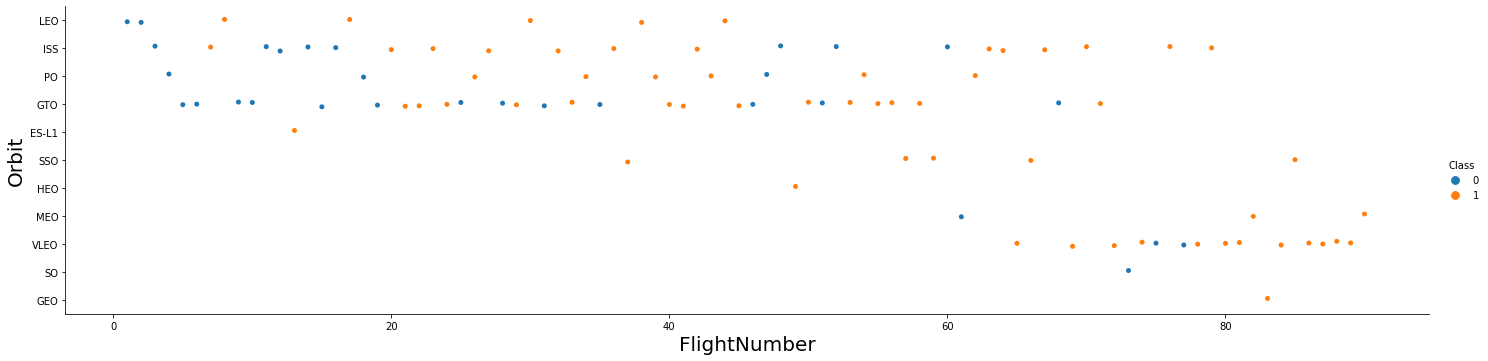

In [25]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


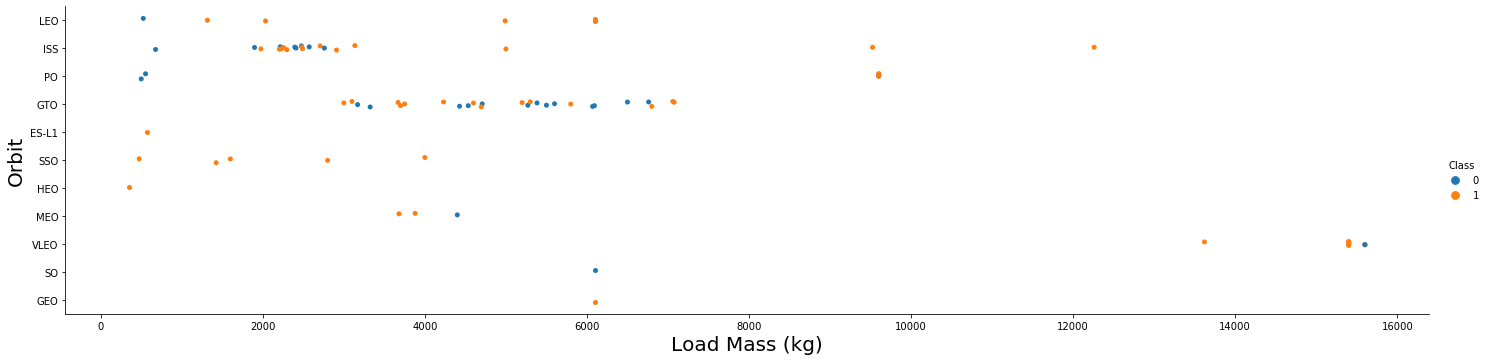

In [27]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 4)
plt.xlabel("Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 

def Extract_year(date):
    year=[]
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

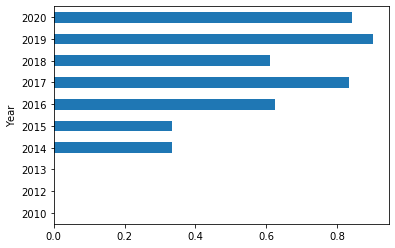

In [165]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Year']=Extract_year(df['Date'])
df.groupby('Year')['Class'].mean().plot.barh()

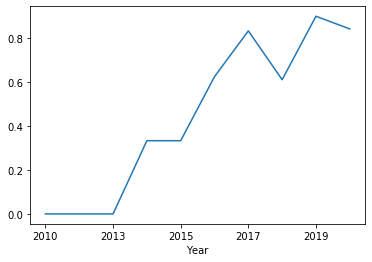

In [166]:
df['Year']=Extract_year(df['Date'])
df.groupby('Year')['Class'].mean().plot()

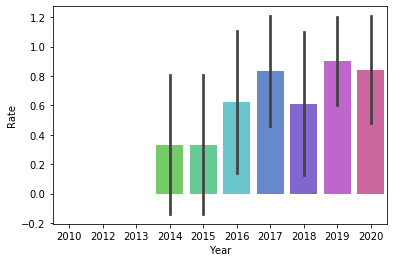

In [171]:
sns.barplot(x = 'Year',y = 'Class',data = df, palette = 'hls', ci='sd')
plt.ylabel("Rate",fontsize=10)
# Show the plot
plt.show()

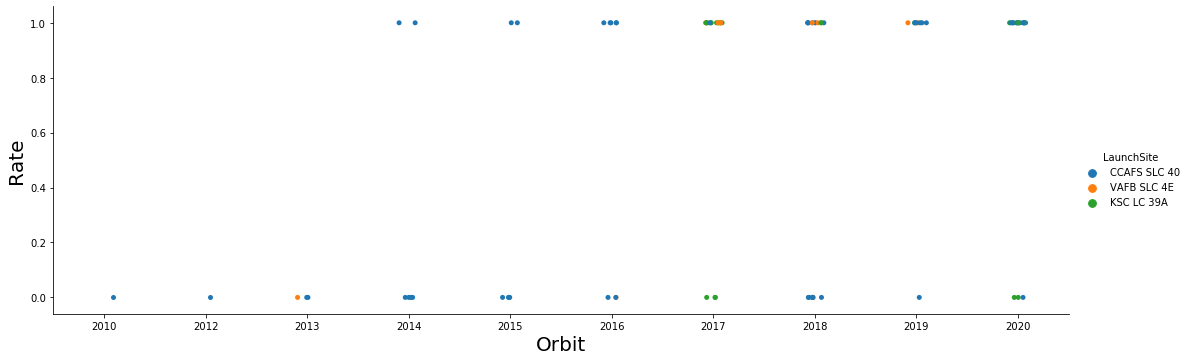

In [178]:
sns.catplot(y="Class", x="Y￼￼ear", hue="LaunchSite", data=df, aspect = 3)
plt.ylabel("Rate",fontsize=20)
plt.xlabel("Orbit",fontsize=20)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


￼￼## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [39]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [44]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial'], drop_first=True)
features_one_hot.head(19)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,3325.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,2296.000000,1,False,False,True,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1316.000000,1,False,False,True,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,4535.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,10,4428.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [48]:
# HINT: use astype function
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [49]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
